# Simulated Annealing (Recocido Simulado)

Simulated annealing (SA), también llamado recocido simulado, es un algoritmo de búsqueda metaheurística para problemas de optimización global; el objetivo general de este tipo de algoritmos es encontrar una buena aproximación al valor óptimo de una función en un espacio de búsqueda grande. En el caso de que tal problema sea de minimización, el óptimo global será aquél para el cual la función objetivo tenga el más pequeño posible de todos los de su espacio de de busqueda. Por el contrario, para un problema de maxización, el óptimo global es aquél con el valor más alto posible.

El nombre e inspiración de SA viene del proceso de recocido del acero y cerámicas, una técnica que consiste en calentar y luego enfriar lentamente el material para variar sus propiedades físicas. El calor causa que los átomos aumenten su energía y que puedan así desplazarse de sus posiciones iniciales (un mínimo local de energía); el enfriamiento lento les da mayores probabilidades de recristalizar en configuraciones con menor energía que la inicial (mínimo global)


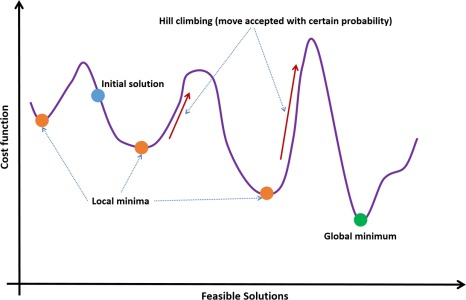

## Algoritmo

El algoritmo simula un pequeño desplazamiento de un átomo que produce un cambio de energía. Si el cambio de energía es negativo, el estado de energía de la nueva configuración es más bajo y la nueva configuración se acepta. Si el cambio de energía es positivo, la nueva configuración tiene un estado de energía superior, sin embargo, puede seguir siendo aceptada bajo el siguiente factor de probabilidad:

$$P = \exp \left( \frac{-\Delta E}{k_bT}\right)$$

donde $k_b$ es la constante de Boltzmann y $T$ es la temperatura actual. Analizando esta ecuación apreciamos dos cosas:  

> 1- La probabilidad es proporcional a la temperatura: a medida que el sólido se enfría, la probabilidad decrece  
> 2- A medida que el cambio de energía es mayor, la probabilidad de aceptación es más baja

Cuando lo aplicamos a un problema real, la energía equivale a una función objetivo, la cual queremos minimizar. Se comienza con una alta "temperatura" y se aplican perturbaciones aleatorias. Si el nuevo punto en la función es menor, se acepta, en caso contrario, puede aceptarse según la fórmula de probabilidad anterior. Esto permite al algoritmo escapar de mínimos locales

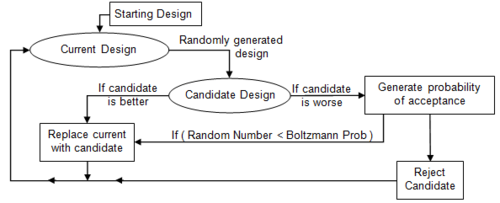

A medida que la temperatura decrece, la probabilidad de que un punto peor se acepte es pequeña. Aunque el algoritmo no garantiza alcanzar la solución óptima, suele encontrar soluciones casi óptimas con menos evaluaciones que otros algoritmos. Además, es facil de implementar

### Ejemplo 1
Programa un algoritmo de SA para minimizar la función $J(x) = -x + 100 (x-0.2)^2 (x-0.8)^2$  
> 1. Dibuja la función con $x\in[0,1]$
> 2. Aplica el siguiente pseudo-código:

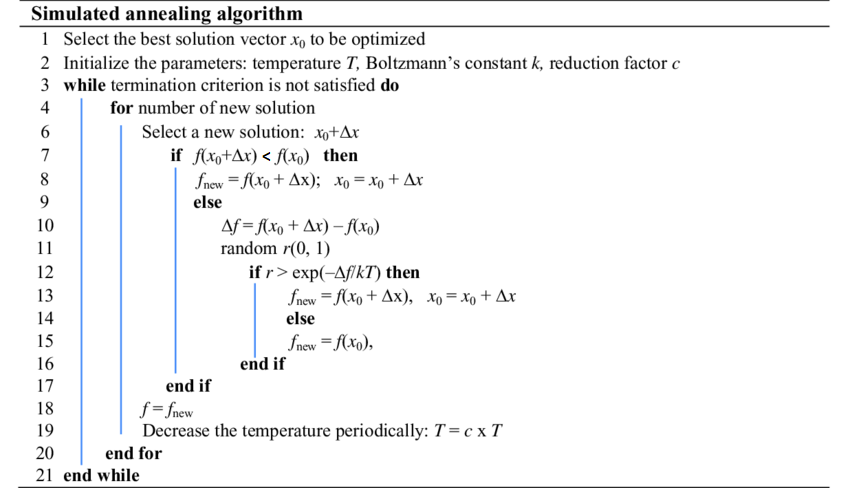

> * Comienza en $x_0 = 0$  
> * Usa 10.000 iteraciones (bucle for)  
> * Usa 8 ciclos de enfriamiento (bucle while) $k=1,2,3...$ 
> * $\Delta x = \epsilon \cdot N(0,1)$ con $\epsilon=0.1$  
> * Temperatura inicial de $k_bT_0=0.1$  
> * Función de decrecimiento de la temperatura $\Delta T = T/\log_2(1+k)$

> 3. Almacena los resultados de $x$ y $J(x)$ y visualizalos

In [12]:
# Define la función objetivo a minimizar
def funJ(x):
    return -x+100*(x-0.2)**2*(x-0.8)**2

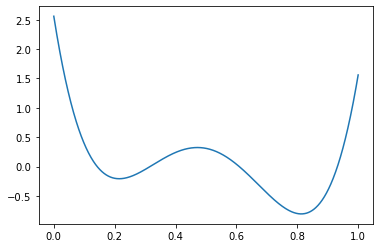

In [15]:
# Dibuja la función en el dominio de x entre 0 y 1
import matplotlib.pyplot as plt
import numpy as np
x = np.linspace(0,1,1000)
plt.plot(x,funJ(x))

In [84]:
# Inicializa los parámetros
N = 10000
VX = np.zeros(N)
VJ = np.zeros(N)

X0 = 0
J0 = funJ(X0)

Xactual = X0
Jactual = J0
T0 = 0.1
fin = 0
epsilon = 0.1
k = 1
K = 2

Jmin = Jactual
Xopt = Xactual

# Algoritmo SA
while fin == 0:
    T = T0/np.log2(1+k)
    
    for n in range(0,N):
        X = Xactual + epsilon * np.random.normal()
        J = funJ(X)
        
        if J<Jactual:
            if J<Jmin:
                Jmin = J
                Xopt = X
            Xactual = X
            Jactual = J
            
        else:
            if np.random.random() < np.exp((Jactual-J)/T):
                Xactual = X
                Jactual = J
                
        VX[n] = Xopt
        VJ[n] = Jmin
        
    k+=1
    if k==K: fin=1

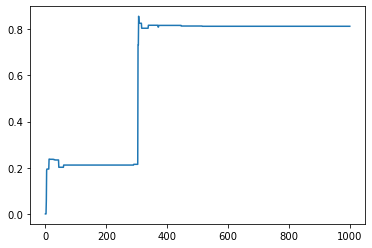

In [87]:
# Plot de la evolución de x
plt.plot(VX[0:1000])

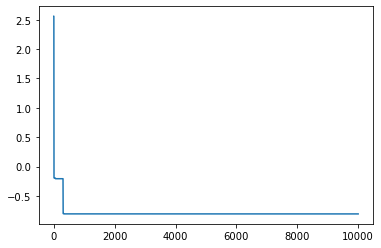

In [86]:
# Plot de la evolución de la función de coste
plt.plot(VJ)

### Ejemplo 2
Minimiza la función $f(x,y)=x^2+y^2+xy-3x-6y+1$

In [92]:
def fxy(x,y):
    return x**2 + y**2 + x*y - 3*x -6*y +1

In [102]:
# Mínimo
fxy(0,3)

-8

In [94]:
from plotly.offline import plot
x = np.linspace(-10,10,1000)
y = x
z = np.zeros((1000,1000))
ix = 0
for xx in x:
    iy = 0
    for yy in y:
        z[ix,iy] = fxy(xx, yy)
        iy += 1
    ix += 1
data = [{'x': x,
         'y': y,
         'z': z,
         'type': 'surface'}]
plot({'data': data}, filename='graph.html')

'graph.html'

In [107]:
# Inicializa los parámetros
N = 10000
VX = [] #np.zeros(N)
VY = [] #np.zeros(N)
VJ = [] #np.zeros(N)
X0 = np.random.normal(0,10)
Y0 = np.random.normal(0,10)
J0 = fxy(X0,Y0)
Xactual = X0
Yactual = Y0
Jactual = J0
T0 = 0.1
fin = 0
epsilon = 0.2 
k = 1
K = 5

Jmin = Jactual
Xopt = Xactual
Yopt = Yactual

# Completa el algoritmo
while fin == 0:
    T = T0/np.log2(1+k)
    for n in range(0,N):
        X = Xactual + epsilon * np.random.normal()
        Y = Yactual + epsilon * np.random.normal()
        J = fxy(X,Y)
        
        if J<Jactual:
            if J<Jmin: 
                Jmin=J
                Xopt = X
                Yopt = Y
            Xactual = X
            Yactual = Y
            Jactual = J
        else:
            if np.random.random() < np.exp((Jactual-J)/T):
                Xactual = X
                Yactual = Y
                Jactual = J
#         VX[n] = Xopt
#         VY[n] = Yopt
#         VJ[n] = Jmin
        VX.append(Xopt)
        VY.append(Yopt)
    k+=1
    if k==K: fin = 1
        

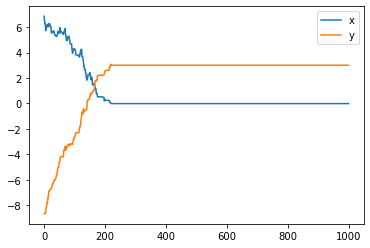

In [108]:
plt.plot(VX[0:1000])
plt.plot(VY[0:1000])
plt.legend(['x','y'])

In [97]:
VX[-1],VY[-1]

(0.0003114866773199221, 2.9998332230016613)

In [98]:
fxy(VX[-1],VY[-1])

-7.999999927110295

### Ejemplo 3
La función Rosenbrock, de $d$ dimensiones, tiene la siguiente ecuación: 

$$J(X)=\sum_{i=1}^{d-1} (100(x_{i+1}-x_i^2)^2+(x_i-1)^2)$$

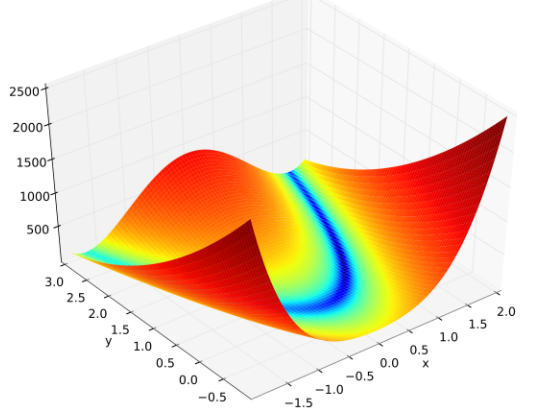

Minimiza la función utilizando SA con $N=1000000$, 10 ciclos de enfriamiento, $T_0=0.05$ y $\epsilon=0.01$. Compara el error para $d \in \{2,5,10,20,50\}$

* 2 dimensiones $J(x_1,x_2)=100\cdot(x_2-x_1^2)^2+(x_1-1)^2$
* 3 dimensiones $J(x_1,x_2,x_3)=100\cdot(x_2-x_1^2)^2+(x_1-1)^2 + 100\cdot(x_3-x_2^2)^2+(x_2-1)^2$

Esta función tiene un mínimo absoluto en $J(1,1,1,1...,1)=0$

In [109]:
def rosen(X):
    suma = 0
    for j in range(len(X)-1):
        suma += 100* (X[j+1]-X[j]**2)**2 + (X[j]-1)**2
    return suma

In [113]:
error = []
for d in [2,5,10,20,50]:
    print(d)
    N=100000
    VX = np.random.normal(size=(d,N))
    VJ = np.zeros(N)
    X0 = VX[:,0]
    J0 = rosen(X0)
    Xactual = X0
    Jactual = J0
    T0=0.05
    fin=0
    epsilon=0.01
    k=1
    K=10
    
    Jmin = Jactual
    Xopt =Xactual
    
    while fin==0:
        T=T0/np.log2(1+k)
        for n in range(0,N):
            X = Xactual + epsilon * np.random.normal(size=d)
            J = rosen(X)
            
            if J<Jactual:
                if J<Jmin:
                    Jmin=J
                    Xopt=X
                Xactual = X
                Jactual = J
            else:
                if np.random.random() < np.exp((Jactual-J)/T):
                    Xactual = X
                    Jactual = J
            
            VX[:,n] = Xopt
            VJ[n] = Jmin
        k+=1
        if k==K: fin=1
    error.append(VJ[-1])

2
5
10
20
50


In [114]:
error

[4.750131457574296e-08,
 0.000315922833552862,
 0.014886932074979207,
 0.2685463353325762,
 36.05884672685856]

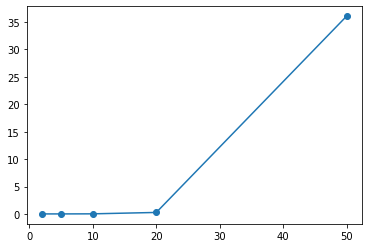

In [116]:
plt.plot([2,5,10,20,50],error,'o-')

## Casos prácticos

The Traveling Salesman: https://toddwschneider.com/posts/traveling-salesman-with-simulated-annealing-r-and-shiny/  
Implementación en Python: https://github.com/perrygeo/simanneal

## Ejercicio
Aplica Simulated Annealing para el problema del viajante. Para ello:  

1) Elije 7 emplazamientos (ciudades, calles, bares...) y asocia un número a cada uno   
2) Utiliza la API OpenCage (https://opencagedata.com/) para transformar direcciones a coordenadas geográficas  
3) Implementa una función para calcular distancias entre puntos de coordenadas  
4) Comienza con una solución inicial aleatoria. Para cada nuevo estado, utiliza subinversión 2-opt:   

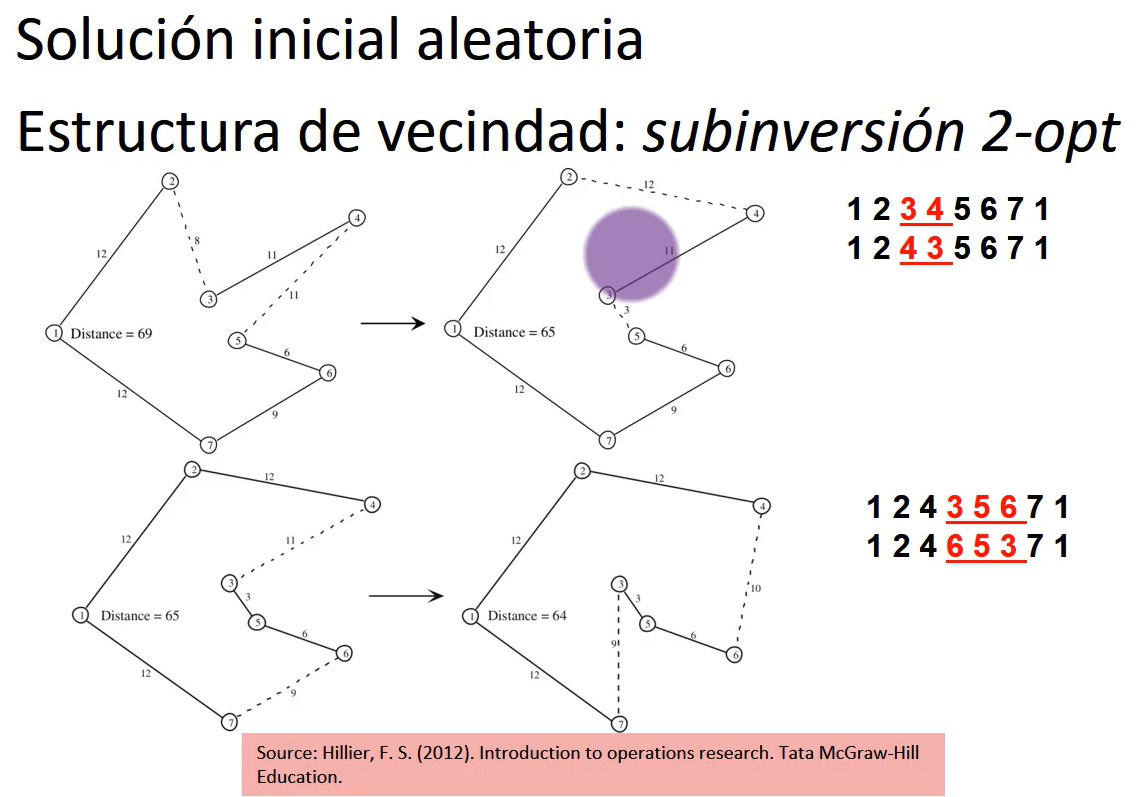


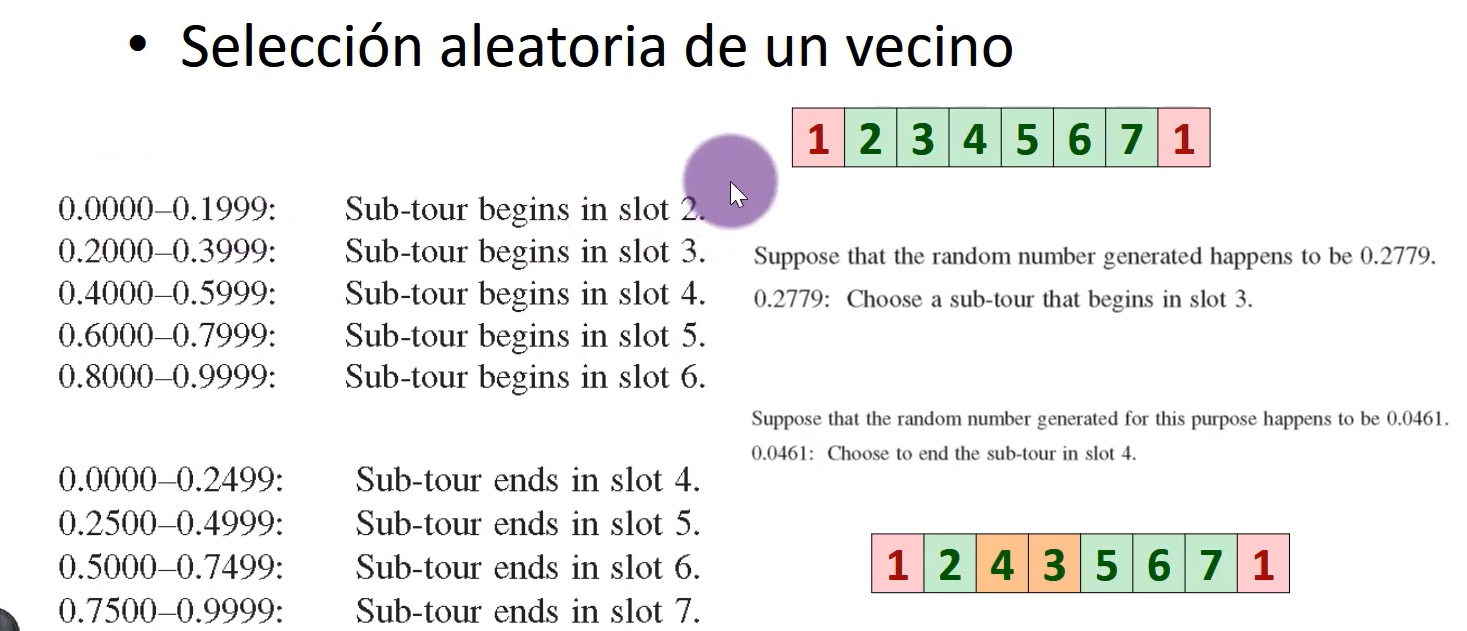

In [122]:
urllib.parse.quote('ñ')

'%C3%B1'

In [131]:
import urllib.request
import urllib.parse
import json

api_key='e1c7e6f1aab4487a873722971682469e'

place1 = 'Paseo de Recoletos 14, Madrid, Spain'
place2 = 'Estadio Santiago Bernabeu, Madrid, Spain'
place3 = 'Calle Alcala 200, Madrid, Spain'
place4 = 'Estadio Wanda Metropolitano, Madrid, Spain'
place5 = 'Museo Thyssen, Madrid, Spain'
place6 = 'Parque del Oeste, Madrid, Spain'
place7 = 'Hospital Zendal, Madrid, Spain'

places = [place1,place2,place3,place4,place5,place6,place7]
latitudes = []
longitudes = []

for place in places:
    url = 'https://api.opencagedata.com/geocode/v1/json?q=' + urllib.parse.quote(place) +'&key='+api_key
    #print(url)

    js = urllib.request.urlopen(url).read()
    obj = json.loads(js)
    
    latitudes.append(obj['results'][0]['geometry']['lat'])
    longitudes.append(obj['results'][0]['geometry']['lng'])


In [132]:
places, latitudes, longitudes

(['Paseo de Recoletos 14, Madrid, Spain',
  'Estadio Santiago Bernabeu, Madrid, Spain',
  'Calle Alcala 200, Madrid, Spain',
  'Estadio Wanda Metropolitano, Madrid, Spain',
  'Museo Thyssen, Madrid, Spain',
  'Parque del Oeste, Madrid, Spain',
  'Hospital Zendal, Madrid, Spain'],
 [40.422402,
  40.4530321,
  40.4206967,
  40.436053,
  40.4162159,
  40.4296961,
  40.4834814],
 [-3.6909051,
  -3.6875478,
  -3.6851451,
  -3.5997158,
  -3.6949317,
  -3.7251884,
  -3.6063005])

In [133]:
def distance(lat1,lon1,lat2,lon2):
    
    from math import sin, cos, sqrt, atan2, radians

    # approximate radius of earth in km
    R = 6373.0

    lat1 = radians(lat1)
    lon1 = radians(lon1)
    lat2 = radians(lat2)
    lon2 = radians(lon2)

    dlon = lon2 - lon1
    dlat = lat2 - lat1

    a = sin(dlat / 2)**2 + cos(lat1) * cos(lat2) * sin(dlon / 2)**2
    c = 2 * atan2(sqrt(a), sqrt(1 - a))

    distance = R * c

    return distance*1000
    

In [135]:
places[0],places[1],distance(latitudes[0],longitudes[0],latitudes[1],longitudes[1])

('Paseo de Recoletos 14, Madrid, Spain',
 'Estadio Santiago Bernabeu, Madrid, Spain',
 3418.8158544529865)

In [ ]:
sol = [0,1,2,3,4,5,6,0]

In [138]:
def dist_tot(sol):
    dT = 0
    for s in range(len(sol)-1):
        dT += distance(latitudes[sol[s]], longitudes[sol[s]],
                       latitudes[sol[s+1]], longitudes[sol[s+1]])
    return dT

In [141]:
dist_tot([0,1,2,4,3,6,5,0])

36372.10103793741

In [174]:
def sub2opt(s0):
    cut1 = np.random.randint(low=1,high=len(s0)-2)
    cut2 = np.random.randint(low=cut1+1,high=len(s0)-1)
    saux = s0[cut1:cut2+1]
    saux.reverse()
    s1 = s0[:cut1] + saux + s0[cut2+1:]
    
    return s1

In [181]:
N = 10000
VX = []
VJ = []
X0 = [0,1,2,3,4,5,6,0]
J0 = dist_tot(X0)
Xactual = X0
Jactual = J0
T0 = 0.1
fin = 0
k = 1
K = 11

Jmin = Jactual
Xopt = Xactual

while fin == 0:
    T = T0/np.log2(1+k)
    for n in range(0,N):
        X = sub2opt(Xactual)
        J = dist_tot(X)
        
        if J<Jactual:
            if J<Jmin:
                Jmin=J
                Xopt=X
            Xactual = X
            Jactual = J
        else:
            if np.random.random() < np.exp((Jactual-J)/T):
                Xactual = X
                Jactual = J
            VX.append(Xopt)
            VJ.append(Jmin)
            
    k+=1
    if k==K: fin=1

In [191]:
len(VJ)

97972

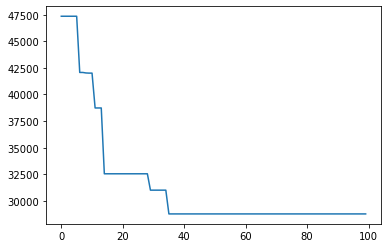

In [182]:
plt.plot(VJ[0:100])

In [183]:
# Distancia óptima
VJ[-1]

28770.781440412764

In [184]:
# Mejor ruta
VX[-1]

[0, 4, 5, 1, 6, 3, 2, 0]

In [185]:
places

['Paseo de Recoletos 14, Madrid, Spain',
 'Estadio Santiago Bernabeu, Madrid, Spain',
 'Calle Alcala 200, Madrid, Spain',
 'Estadio Wanda Metropolitano, Madrid, Spain',
 'Museo Thyssen, Madrid, Spain',
 'Parque del Oeste, Madrid, Spain',
 'Hospital Zendal, Madrid, Spain']

In [186]:
for ind in VX[-1]:
    print(places[ind])

Paseo de Recoletos 14, Madrid, Spain
Museo Thyssen, Madrid, Spain
Parque del Oeste, Madrid, Spain
Estadio Santiago Bernabeu, Madrid, Spain
Hospital Zendal, Madrid, Spain
Estadio Wanda Metropolitano, Madrid, Spain
Calle Alcala 200, Madrid, Spain
Paseo de Recoletos 14, Madrid, Spain


In [187]:
X0

[0, 1, 2, 3, 4, 5, 6, 0]

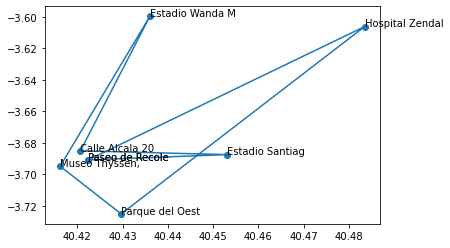

In [189]:
import matplotlib.pyplot as plt

coord = []
plc = []
for ind in X0:
    coord.append([latitudes[ind], longitudes[ind]])
    plc.append(places[ind])
    

xs, ys = zip(*coord)
fig, ax = plt.subplots()

plt.plot(xs,ys,'o-')

for i, txt in enumerate(plc):
    ax.annotate(txt[0:15], (xs[i],ys[i]))
    
plt.show()

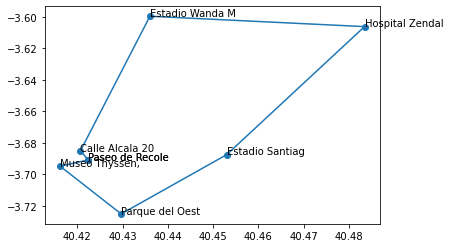

In [190]:
import matplotlib.pyplot as plt

coord = []
plc = []
for ind in VX[-1]:
    coord.append([latitudes[ind], longitudes[ind]])
    plc.append(places[ind])
    

xs, ys = zip(*coord)
fig, ax = plt.subplots()

plt.plot(xs,ys,'o-')

for i, txt in enumerate(plc):
    ax.annotate(txt[0:15], (xs[i],ys[i]))
    
plt.show()